In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

mpl.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Ariel']
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '25'
mpl.rcParams['ytick.labelsize'] = '25'

In [2]:
color_map = {
    'cyan': '#66c2a5',
    'orange': '#ff7f00',
    'blue': '#8da0cb',
    'purple': '#7570b3',
    'pink': '#fccde5',
    'green': '#33a02c',
    'yellow': '#ffd92f',
    'brown': '#e5c494',
    'magenta': '#f1598a',
    'grey': '0.3'
}

In [3]:
from astropy.table import Table
import astropy.units as u
import astropy.constants as c

In [17]:
import sys
sys.path.append('../tools/')
from dust_extinction import calALambda
from data_binning import data_binning

In [89]:
spec = pd.read_csv('./Host_DEIMOS_reduction/peculiarSN_spec.csv')
spec_m = pd.read_csv('./Host_DEIMOS_reduction/peculiarSN_mod_spec.csv')
phot_m = pd.read_csv('./Host_DEIMOS_reduction/peculiarSN_mod_phot.csv')

## 20jgb host
PS g - 20.08, 0.13

PS r - 19.54, 0.05

PS i - 19.46, 0.07

PS z - 19.34, 0.05

PS y - 19.09, 0.16

Vista J (1.254 micron) - 18.84, 0.15

Vista Ks (2.149 micron) - 19.03, 0.31

In [10]:
phot_mag = np.array([20.08, 19.54, 19.46, 19.34, 19.09, 18.84, 19.03])
phot_mag_err = np.array([0.13, 0.05, 0.07, 0.05, 0.16, 0.15, 0.31])
phot = 10**(-phot_mag / 2.5) * 3631 * 1e6  #muJy
phot_err = (10**(-(phot_mag - phot_mag_err) / 2.5) -
            10**(-(phot_mag + phot_mag_err) / 2.5)) / 2 * 3631 * 1e6

In [272]:
z = 0.0309

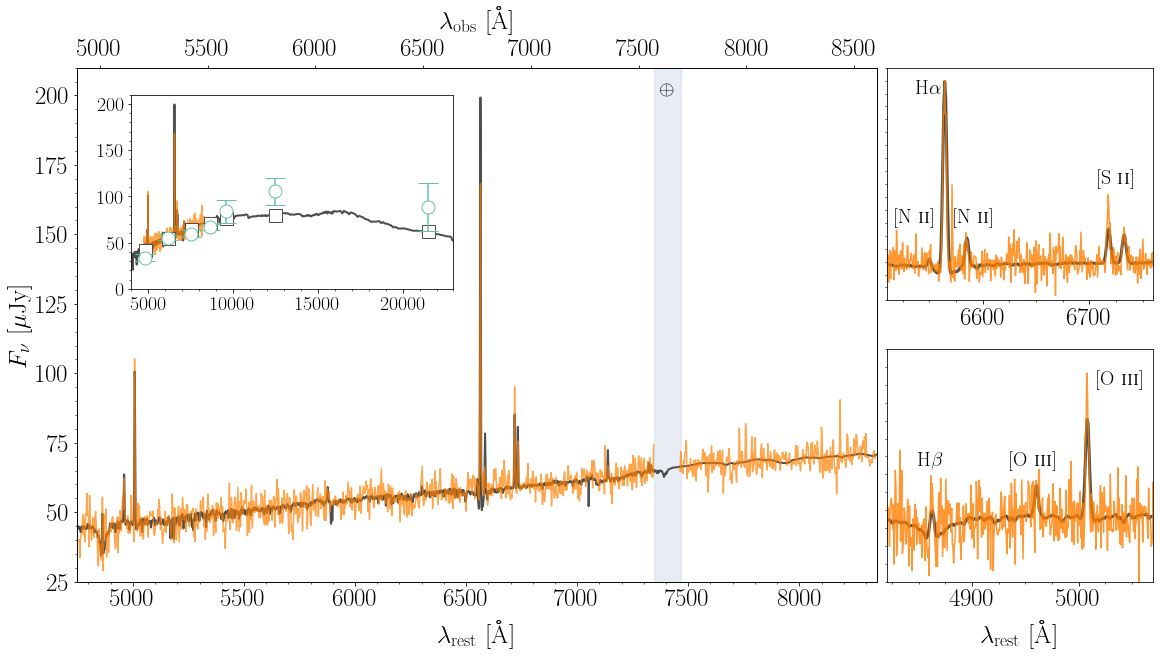

In [299]:
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True, figsize=(16, 9))
gspec = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)
ax_opt = fig.add_subplot(gspec[:, :3])
ax0 = fig.add_axes([0.11, 0.56, 0.28, 0.3])
ax_Halpha = fig.add_subplot(gspec[0, 3])
ax_Hbeta = fig.add_subplot(gspec[1, 3])

# spectroscopy
for ax in [ax0, ax_opt]:
    ax.plot(spec_m['wspec'] / (1 + z),
            spec_m['mspec'],
            color=color_map['grey'],
            linewidth=2)
    ax.plot(spec_bin[spec_bin[:, 0] < 7633, 0] / (1 + z),
            spec_bin[spec_bin[:, 0] < 7633, 1],
            color=color_map['orange'],
            alpha=0.7)
    ax.plot(spec_bin[spec_bin[:, 0] > 7633, 0] / (1 + z),
            spec_bin[spec_bin[:, 0] > 7633, 1],
            color=color_map['orange'],
            alpha=0.7)
ax0.yaxis.set_minor_locator(MultipleLocator(10))
ax0.xaxis.set_minor_locator(MultipleLocator(1000))
ax_opt.yaxis.set_minor_locator(MultipleLocator(5))
ax_opt.xaxis.set_minor_locator(MultipleLocator(100))
ax0.set_ylim(0, 210)
ax0.set_yticks([0, 50, 100, 150, 200])
ax0.set_xlim(4000, 23000)
ax0.tick_params(labelsize=20)
ax_opt.set_ylim(25, 210)
ax_opt.set_xlim(4750, 8350)
ax_opt.set_xlabel(r'$\lambda_\mathrm{rest}\ [\mathrm{\r{A}}]$', labelpad=10)
ax_opt.set_ylabel(r'$F_\nu\ [\mu\mathrm{Jy}]$')

# photometry
ax0.plot(phot_m['wphot'],
         phot_m['mphot'],
         'ks',
         markerfacecolor='white',
         ms=13,
         markeredgecolor=color_map['grey'])
ax0.errorbar(phot_m['wphot'],
             phot,
             yerr=phot_err,
             fmt='o',
             capsize=10,
             markerfacecolor='white',
             markeredgecolor=color_map['cyan'],
             ecolor=color_map['cyan'],
             ms=13)

# telluric
ax_opt.text(7633 / (1 + z), 200, r'$\oplus$', ha='center', fontsize=20)

ax_opt.fill_between([7633 / (1 + z) - 60, 7633 / (1 + z) + 60], [0, 0],
                    [210, 210],
                    color=color_map['blue'],
                    alpha=0.2)

wv_obs = ax_opt.twiny()
wv_obs.set_xlim(np.array(ax_opt.get_xlim()) * (1 + z))
wv_obs.set_xlabel(r'$\lambda_\mathrm{obs}\ [\mathrm{\r{A}}]$', labelpad=10)
wv_obs.xaxis.set_minor_locator(MultipleLocator(1000))

# emission lines
for ax in [ax_Halpha, ax_Hbeta]:
    ax.plot(spec_m['wspec'] / (1 + z),
            spec_m['mspec'],
            color=color_map['grey'],
            linewidth=3)
    ax.plot(spec['wavelength'] / (1 + z),
            spec['spec'],
            color=color_map['orange'],
            alpha=0.8)
    #ax.tick_params(labelsize=20)
    ax.xaxis.set_minor_locator(MultipleLocator(25))
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    ax.set_yticks([])

ax_Halpha.set_xlim(6510, 6760)
ax_Halpha.set_ylim(30, 210)
ax_Hbeta.set_xlim(4820, 5070)
ax_Hbeta.set_ylim(10, 140)
ax_Hbeta.set_xlabel(r'$\lambda_\mathrm{rest}\ [\mathrm{\r{A}}]$', labelpad=10)

offset = 10
ax_Hbeta.text(4861, 75, r'$\mathrm{H}\beta$', ha='center', fontsize=20)
ax_Hbeta.text(5007 + offset,
              120,
              r'$[\mathrm{O}\ \textsc{iii}]$',
              ha='left',
              fontsize=20)
ax_Hbeta.text(4959,
              75,
              r'$[\mathrm{O}\ \textsc{iii}]$',
              ha='center',
              fontsize=20)
ax_Halpha.text(6562, 190, r'$\mathrm{H}\alpha$', ha='right', fontsize=20)
ax_Halpha.text(6583 + offset,
               90,
               r'$[\mathrm{N}\ \textsc{ii}]$',
               ha='center',
               fontsize=20)
ax_Halpha.text(6548 - offset,
               90,
               r'$[\mathrm{N}\ \textsc{ii}]$',
               ha='center',
               fontsize=20)
ax_Halpha.text(6731 - offset / 2,
               120,
               r'$[\mathrm{S}\ \textsc{ii}]$',
               ha='center',
               fontsize=20)

fig.savefig('../paper/figures/DEIMOS_20jgb.pdf', bbox_inches='tight')